In [2]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('https://query.data.world/s/fgpmczptzlakpvpcuuoxrotp65hsjl')
df.head()
# Supervised learning data
# X and y

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [10]:
df.drop('species', axis =1, inplace = True)
# Don't need to do this step for assignment

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['ID'] = df.index+100
# Country column. You don't need to do this step

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [14]:
feature = df.columns[:-1]
for i in enumerate(feature):
    print(i)

(0, 'sepal_length')
(1, 'sepal_width')
(2, 'petal_length')
(3, 'petal_width')


## EDA

In your assignment please perfom more EDA than what I have done over here

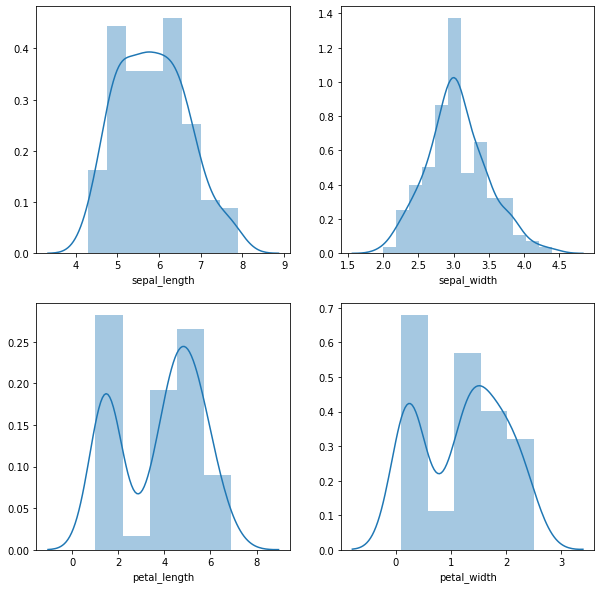

In [15]:
plt.figure(figsize = (10,10))
feature = df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(df[i[1]])

In [16]:
# I will use Petal_length and petal_width for cluster profiling but for assignment: GDP, Income and Chil_mort

## Outlier Treatment

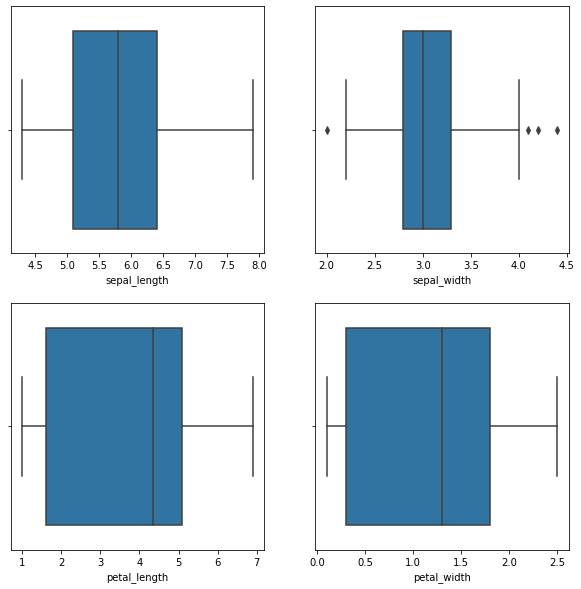

In [17]:
plt.figure(figsize = (10,10))
feature = df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

Taking care of outliers
Outlier removal: My data is less

Outlier Capping: Demo

Assignment
Please don't cap or drop the outliers that are in the lower range except the child_mort, for don't need to touch the outliers in the upper range

- For all the columns, please don't cap or drop the outliers at the lower range but you may treat the upper range outliers and this is because, we may end up loosing some countries are are actually in the need of AID.
- For child_mort, please don't cap or drop the outliers at the upper range but you may treat the lower range outliers.


- 1-99: Soft range
- 5-95: mid range
- 25-75: hard range

In [20]:
# capping

q1 = df['sepal_width'].quantile(0.01)
q4 = df['sepal_width'].quantile(0.99)

df['sepal_width'][df['sepal_width']<= q1] = q1
df['sepal_width'][df['sepal_width']>= q4] = q4

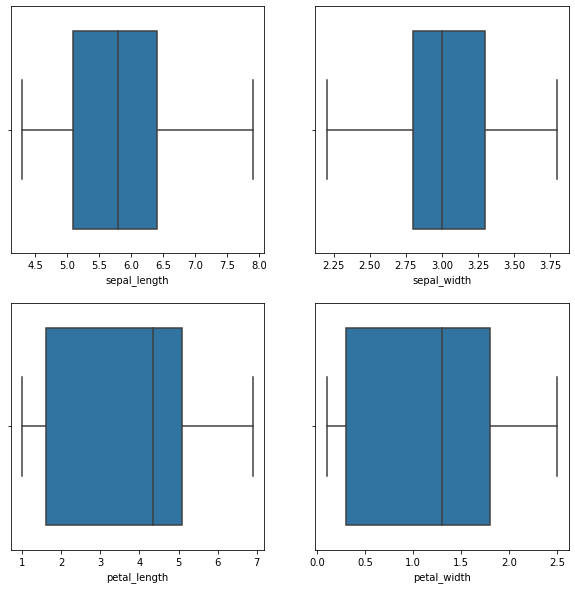

In [21]:
plt.figure(figsize = (10,10))
feature = df.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

## Clustering

In [23]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
hopkins(df.drop('ID', axis = 1))

0.8291750822503919

## Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('ID', axis = 1))
df1

array([[-9.00681170e-01,  1.05447769e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.25943021e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.46225265e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.10141122e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.29056183e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.99881426e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.18393550e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.18393550e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.62027163e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.10141122e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.52664598e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.18393550e-01, -1.22754100e+00,
      

In [40]:
df1 = pd.DataFrame(df1, columns = df.columns[:-1])
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


## K-Mean Clustering

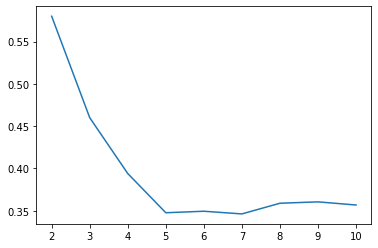

In [41]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

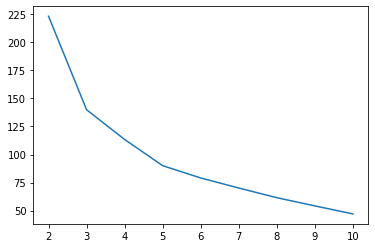

In [43]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [49]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [53]:
df_kmean = df.copy()

In [55]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,0
1,0
2,0
3,0
4,0


In [58]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,label
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


In [59]:
df_kmean.label.value_counts()

2    53
0    50
1    47
Name: label, dtype: int64

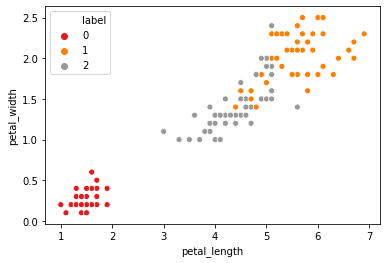

In [62]:
# Plot the cluster
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'label', data = df_kmean, palette = 'Set1')

In [ ]:
# GDP CHIL_MORT INCOME

## Clsuter Profiling

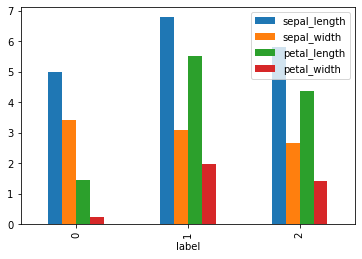

In [64]:
# Making sense out of the clsuters
df_kmean.drop('ID', axis = 1).groupby('label').mean().plot(kind = 'bar')

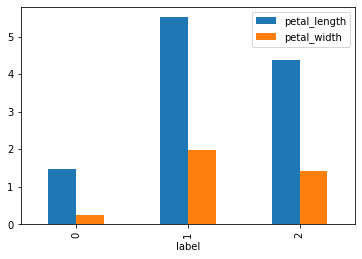

In [65]:
# GDP, INCOME AND CHID_MORT
df_kmean.drop(['ID', 'sepal_length', 'sepal_width'], axis = 1).groupby('label').mean().plot(kind = 'bar')

In [69]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

df_kmean[df_kmean['label'] == 0]

,sepal_length,sepal_width,petal_length,petal_width,ID,label
0,5.1,3.500,1.4,0.2,100,0
1,4.9,3.000,1.4,0.2,101,0
2,4.7,3.200,1.3,0.2,102,0
3,4.6,3.100,1.5,0.2,103,0
4,5.0,3.600,1.4,0.2,104,0
5,5.4,3.900,1.7,0.4,105,0
6,4.6,3.400,1.4,0.3,106,0
7,5.0,3.400,1.5,0.2,107,0
8,4.4,2.900,1.4,0.2,108,0
9,4.9,3.100,1.5,0.1,109,0


In [71]:
df_kmean[df_kmean['label'] == 0].sort_values(by = ['petal_length', 'petal_width'], ascending = [False, True]).head(5)

,sepal_length,sepal_width,petal_length,petal_width,ID,label
24,4.8,3.4,1.9,0.2,124,0
44,5.1,3.8,1.9,0.4,144,0
20,5.4,3.4,1.7,0.2,120,0
18,5.7,3.8,1.7,0.3,118,0
5,5.4,3.9,1.7,0.4,105,0


In [ ]:
# Hierarchical Clustering
# Single linkage
# Complete linkage

# Use anyone of it based on the performance for final clustering
# Plot the cluster
# Cluster profiling
# Top-5 countries based on the need or urgert AID